In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [3]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


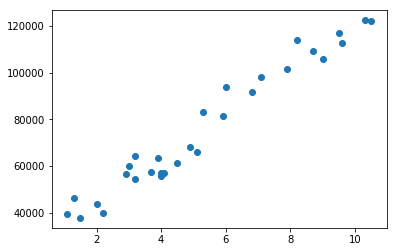

In [9]:
plt.scatter(df.YearsExperience, df.Salary)

In [20]:
y = df.Salary
X = df.drop(columns=['Salary'])

In [22]:
y[:3]

0    39343.0
1    46205.0
2    37731.0
Name: Salary, dtype: float64

In [23]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [26]:
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
X_train.shape, X_test.shape

((20, 2), (10, 2))

In [29]:
model = sm.OLS(y_train, X_train)
results = model.fit()

In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     381.3
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           1.45e-13
Time:                        01:41:11   Log-Likelihood:                -200.48
No. Observations:                  20   AIC:                             405.0
Df Residuals:                      18   BIC:                             406.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.532e+04   2743.538      9.231      0.000    1.96e+04    3.11e+04
YearsExperience  9426.0388    482.706     19.527      0.000    8411.911    1.04e+04
==============================================================================
Omnibus:                        0.822   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.819
Skew:                           0.380   Prob(JB):                        0.664
Kurtosis:                       2.363   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
results.params

const              25324.335379
YearsExperience     9426.038769
dtype: float64

In [32]:
y_hat = results.predict(X_test)
r2_score(y_test, y_hat)

0.9553063138044949

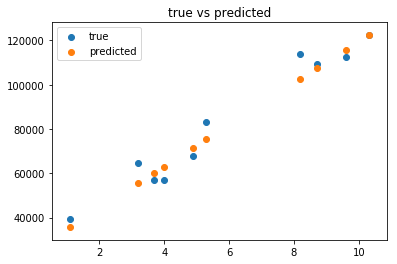

In [38]:
plt.scatter(X_test.YearsExperience, y_test, label='true')
plt.scatter(X_test.YearsExperience, y_hat, label='predicted')
plt.title('true vs predicted')
plt.legend()